# Práctica 2 - Bioseñales
- Elisabeth Gomez Cano.
- Marly Alejandra Ortega Andrade.
- Juan Esteban Pineda Lopera.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

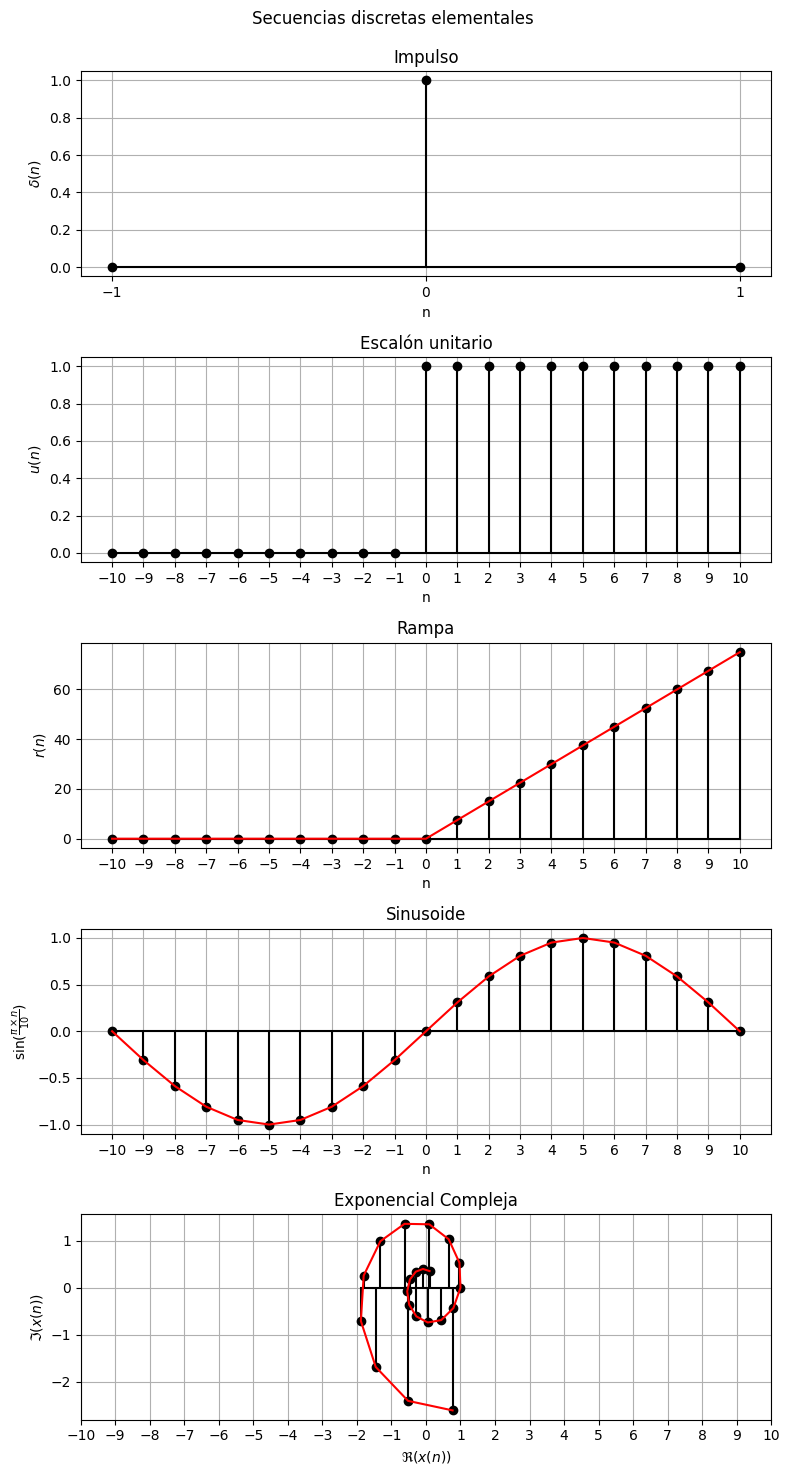

In [6]:
# Impulso unitario
def impseq(n0, n1, n2):
  """
  Genera x(n) = delta(n-n0); n1 <= n <= n2
  """
  n = np.arange(n1,n2+1) # Se crea el vector de muestras
  x = (n-n0) == 0
  return [x, n]

# Escalon unitario
def escalon(n0, n1, n2):
  """
  Genera x(n) = u(n-n0); n1 <= n <= n2
  """
  n = np.arange(n1, n2+1) # Se crea el vector de muestras
  x = n >= n0
  return [x, n]

# Rampa unitaria
def rampa(n0, n1, n2, m):
  """
  Genera x(n) = r(n-n0); n1 <= n <= n2
  """
  n = np.arange(n1, n2+1) # Se crea el vector de muestras
  x = n >= n0
  y = m * (n-n0) * x

  return [y, n]

# Exponencial compleja
def expon_complex(omega, sigma, theta, n1, n2):
  """
  Genera x(n) = e^((sigma + i*theta*omega)*n); n1 <= n <= n2
  """
  n = np.arange(n1, n2 + 1)
  x =  np.exp((sigma + 1j*theta*omega) * n)

  return [x, n]

# Sinusoidal
def sinusoide(omega, theta, n1, n2):
  """
  Genera x(n) = sin(omega*n + theta); n1 <= n <= n2
  """
  n = np.arange(n1, n2 + 1)
  x = np.sin(omega*n + theta)

  return [x, n]

# Crear una figura con subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 15))  # 5 filas, 1 columna
plt.suptitle('Secuencias discretas elementales \n')

# Función impulso
x, n = impseq(0, -1, 1)
axs[0].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[0].set_xlabel('n')
axs[0].set_xticks(n)
axs[0].set_ylabel(r'$\delta(n)$')
axs[0].grid(True)
axs[0].set_title("Impulso")

# Función escalón
x, n = escalon(0, -10, 10)
axs[1].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[1].set_xlabel('n')
axs[1].set_ylabel(r'$u(n)$')
axs[1].set_xticks(n)
axs[1].grid(True)
axs[1].set_title('Escalón unitario')

# Función rampa
x, n = rampa(0, -10, 10, 7.5)
axs[2].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[2].plot(n, x, color='red')
axs[2].set_xlabel('n')
axs[2].set_ylabel(r'$r(n)$')
axs[2].set_xticks(n)
axs[2].grid('True')
axs[2].set_title('Rampa')

# Función sinusoidal
x, n = sinusoide( (1/10) * np.pi, 0, -10, 10) # Sinusoidal con periodo 20
axs[3].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[3].plot(n, x, color='red')
axs[3].set_xlabel('n')
axs[3].set_ylabel(r'$\sin(\frac{\pi \times n}{10})$')
axs[3].set_xticks(n)
axs[3].grid(True)
axs[3].set_title("Sinusoide")

# Función exponencial compleja
# No se puede graficar sencillamente x(n) vs n, por lo que se hace el diagrama
# de Argand (parte imaginaria vs real)
x, n = expon_complex(1, 0.1, 0.5, -10, 10)
axs[4].stem(np.real(x), np.imag(x), linefmt='black', markerfmt='black', basefmt='black')
axs[4].plot(np.real(x), np.imag(x), color='red')
axs[4].set_xlabel(r'$\Re(x(n))$')
axs[4].set_ylabel(r'$\Im(x(n))$')
axs[4].set_xticks(n)
axs[4].grid(True)
axs[4].set_title("Exponencial Compleja")

# Mostrar los subplots
plt.tight_layout()
plt.show()

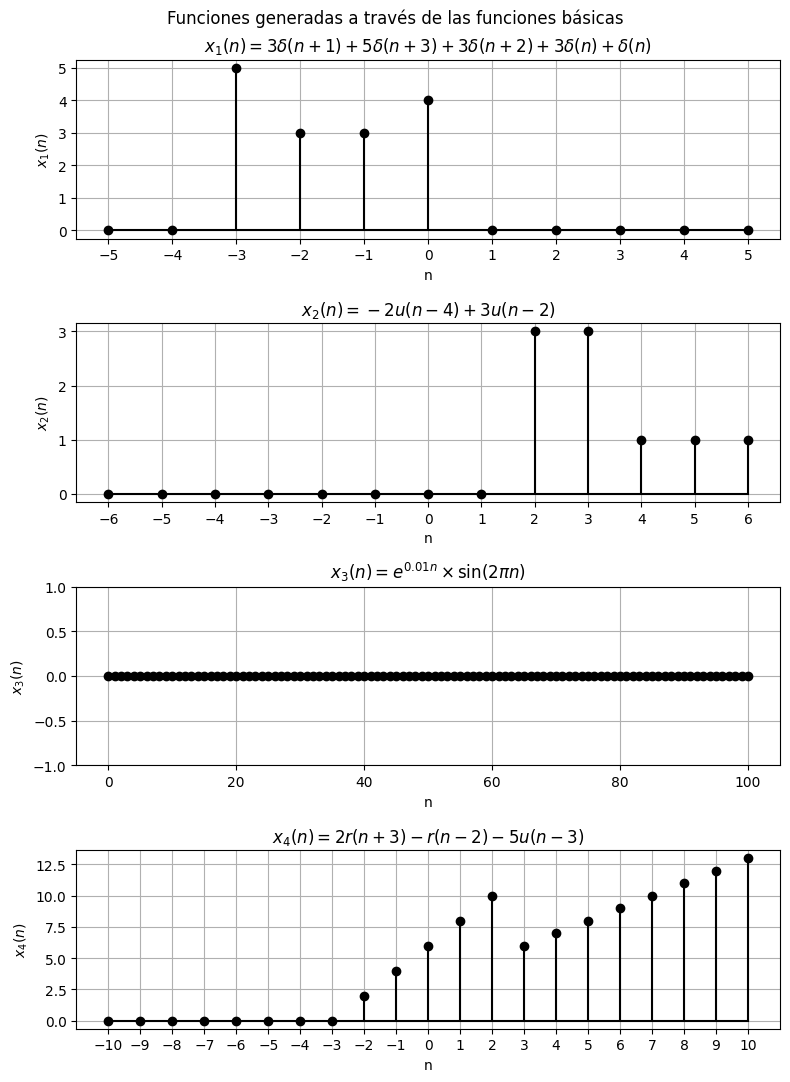

In [7]:
fig, axs = plt.subplots(4, 1, figsize=(8, 11))  # 4 filas, 1 columna
plt.suptitle('Funciones generadas a través de las funciones básicas')

# Función x_1(n)
x = 3 * impseq(-1, -5, 5)[0] + 5 * impseq(-3, -5, 5)[0] + 3 * impseq(-2, -5, 5)[0] + 3 * impseq(0, -5, 5)[0] + impseq(0, -5, 5)[0]
n = np.arange(-5, 6)
axs[0].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[0].set_xlabel('n')
axs[0].set_ylabel(r'$x_1(n)$')
axs[0].set_xticks(n)
axs[0].grid(True)
axs[0].set_title(r'$x_1(n) = 3 \delta (n+1) + 5 \delta (n+3) + 3 \delta (n+2) + 3 \delta (n) + \delta (n)$')

# Funcion x_2(n)
x = -2 * escalon(4, -6, 6)[0] + 3 * escalon(2, -6, 6)[0]
n = np.arange(-6, 7)
axs[1].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[1].set_xlabel('n')
axs[1].set_ylabel(r'$x_2(n)$')
axs[1].set_xticks(n)
axs[1].grid(True)
axs[1].set_title(r'$x_2(n) = -2u(n-4) + 3u(n-2)$')

# Funcion x_3(n)
x = expon_complex(0, 0.01, 0, 0, 100)[0] * sinusoide(2 * np.pi, 0, 0, 100)[0]
n = np.arange(0, 101)
axs[2].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
# Se establecen limites en el eje y para observar mejor como la función es
# aproximadamente cero en toda su extensión
axs[2].set_ylim(-1,1)
axs[2].set_xlabel('n')
axs[2].set_ylabel(r'$x_3(n)$')
axs[2].grid(True)
axs[2].set_title(r'$x_3(n) = e^{0.01n} \times \sin(2 \pi n)$')

# Funcion x_4(n)
x = 2 * rampa(-3, -10, 10, 1)[0] - rampa(2, -10, 10, 1)[0] - 5*escalon(3, -10, 10)[0]
n = np.arange(-10, 11)
axs[3].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[3].set_xlabel('n')
axs[3].set_ylabel(r'$x_4(n)$')
axs[3].set_xticks(n)
axs[3].grid(True)
axs[3].set_title(r'$x_4(n) = 2r(n+3) - r(n-2) - 5u(n-3)$')

# Mostrar los subplots
plt.tight_layout()
plt.show()

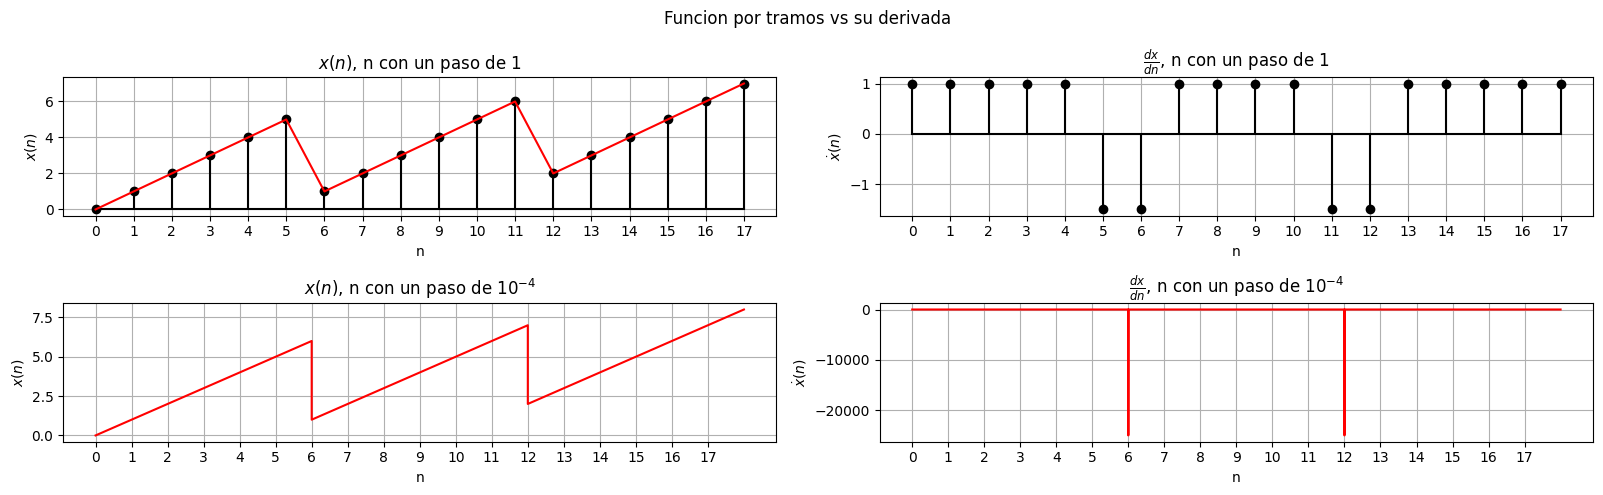

In [8]:
def rampa_continua(n0, n1, n2, m):
  """
  Genera x(n) = r(n-n0); n1 <= n <= n2
  """
  n = np.arange(n1, n2+1, 1e-4) # Se crea el vector de muestras
  x = n >= n0
  y = m * (n-n0) * x

  return [y, n]

# Secuencia por tramos
x_1 = rampa(0, 0, 5, 1)[0]
x_2 = rampa(5, 6, 11, 1)[0]
x_3 = rampa(10, 12, 17, 1)[0]
x = np.concatenate((x_1, x_2, x_3))
n = np.arange(0, 18)

x_der = np.gradient(x, n)

# Version continua
x_1 = rampa_continua(0, 0, 5, 1)[0]
x_2 = rampa_continua(5, 6, 11, 1)[0]
x_3 = rampa_continua(10, 12, 17, 1)[0]
x_cont = np.concatenate((x_1, x_2, x_3))
n_cont = np.arange(0, 18, 1e-4)

x_der_cont = np.gradient(x_cont, n_cont)

# Gráfica
fig, axs = plt.subplots(2, 2, figsize=(16, 5))  # 2 filas, 2 columna
plt.suptitle('Funcion por tramos vs su derivada')

# Con n en los enteros positivos
axs[0, 0].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[0, 0].plot(n, x, color='red')
axs[0, 0].set_xlabel('n')
axs[0, 0].set_ylabel(r'$x(n)$')
axs[0, 0].set_xticks(n)
axs[0, 0].grid(True)
axs[0, 0].set_title(r'$x(n)$, n con un paso de 1')

axs[0, 1].stem(n, x_der, linefmt='black', markerfmt='black', basefmt='black')
axs[0, 1].set_xlabel('n')
axs[0, 1].set_ylabel(r'$\dot{x}(n)$')
axs[0, 1].set_xticks(n)
axs[0, 1].grid(True)
axs[0, 1].set_title(r'$\frac{dx}{dn}$, n con un paso de 1')

# Aproximación de n como una variable continua
axs[1, 0].plot(n_cont, x_cont, color='red')
axs[1, 0].set_xlabel('n')
axs[1, 0].set_ylabel(r'$x(n)$')
axs[1, 0].set_xticks(n)
axs[1, 0].grid(True)
axs[1, 0].set_title(r'$x(n)$, n con un paso de $10^{-4}$')

axs[1, 1].plot(n_cont, x_der_cont, color='red')
axs[1, 1].set_xlabel('n')
axs[1, 1].set_ylabel(r'$\dot{x}(n)$')
axs[1, 1].set_xticks(n)
axs[1, 1].grid(True)
axs[1, 1].set_title(r'$\frac{dx}{dn}$, n con un paso de $10^{-4}$')

plt.tight_layout()
plt.show()

En señales discretas no puede evidenciarse el cambio instantáneo, sino el incremento entre muestras. La derivada de una disminución inmediata, en una señal continua, tiende a $-\infty$, pero en el caso de una señal discreta, el valor solo representa la pendiente de la disminución entre muestras. Al aumentar la frecuencia de muestreo, se evidencia como el valor de la derivada en los puntos de cambio instantáneo tiende a disminuir a $-\infty$.

C:\Users\Juan Pineda\AppData\Local\Temp\ipykernel_21672\1668533509.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


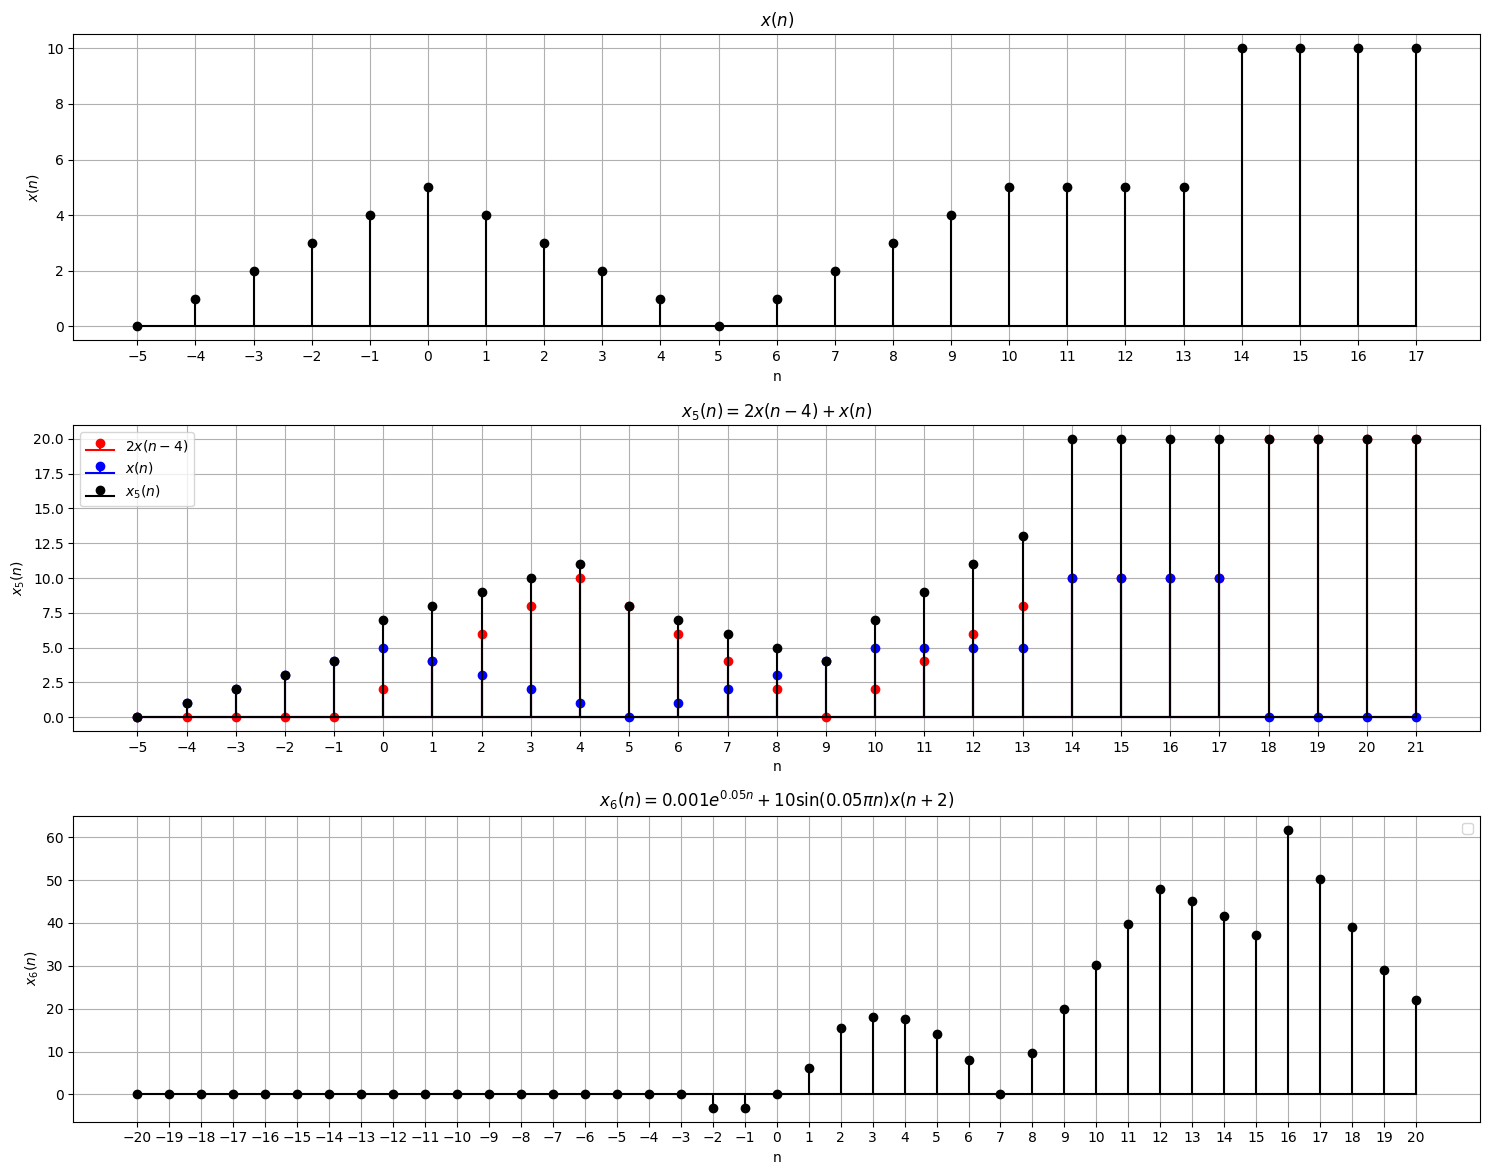

In [9]:

x_a = rampa(-5, -5, 0, 1)[0]
x_b = rampa(-1, 0, 4, -1)[0] + 5
x_c = rampa(4, 5, 9, 1)[0]
x_d = 5 * escalon(10, 10, 12)[0]
x_e = 10 * escalon(13, 13, 16)[0]

x = np.concatenate((x_a, x_b, x_c, x_d, x_e))
n = np.arange(-5, 18)

x_5a = np.concatenate((np.zeros(4), 2*x))
x_5b = np.concatenate((x, np.zeros(4)))
x_5 = x_5a + x_5b
n_5 = np.arange(-5, 22)

x_6a = 0.001 * expon_complex(0, 0.5, 0, -20, 20)[0]
x_6b = 10 * sinusoide(0.05 * np.pi, 0, -20, 20)[0]
x_6c = np.concatenate((np.zeros(17), x, np.zeros(1)))
x_6 = x_6a + x_6b * x_6c
n_6 = np.arange(-20, 21)

# Grafica
fig, axs = plt.subplots(3, 1, figsize=(15, 12))  # 3 filas, 1 columna
plt.suptitle('')

# Gráfica de x(n)
axs[0].stem(n, x, linefmt='black', markerfmt='black', basefmt='black')
axs[0].set_xlabel('n')
axs[0].set_ylabel(r'$x(n)$')
axs[0].set_xticks(n)
axs[0].grid(True)
axs[0].set_title(r'$x(n)$')

# Gráfica de x_5(n)
axs[1].stem(n_5, x_5a, linefmt='red', markerfmt='red', basefmt='red', label=r'$2x(n-4)$')
axs[1].stem(n_5, x_5b, linefmt='blue', markerfmt='blue', basefmt='blue', label=r'$x(n)$')
axs[1].stem(n_5, x_5, linefmt='black', markerfmt='black', basefmt='black', label=r'$x_5(n)$')
axs[1].set_xlabel('n')
axs[1].set_ylabel(r'$x_5(n)$')
axs[1].set_xticks(n_5)
axs[1].grid(True)
axs[1].set_title(r'$x_5(n) = 2x(n-4) + x(n)$')
axs[1].legend()

# Gráfica de x_6(n)
axs[2].stem(n_6, x_6, linefmt='black', markerfmt='black', basefmt='black')
axs[2].legend()
axs[2].set_xlabel('n')
axs[2].set_ylabel(r'$x_6(n)$')
axs[2].set_xticks(n_6)
axs[2].grid(True)
axs[2].set_title(r'$x_6(n) = 0.001e^{0.05n} + 10 \sin(0.05 \pi n) x(n + 2)$')


plt.tight_layout()
plt.show()